In [1]:
# Importing the required libraries

import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
# Loading the dataset
messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Data cleaning and preprocessing
wordnet = WordNetLemmatizer()
corpus = []

for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [4]:
messages['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [5]:
corpus[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [6]:
# Creating a TF-IDF model

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
X = tf.fit_transform(corpus).toarray()

y = pd.get_dummies(messages['label'])
y = y.iloc[:,1].values

In [7]:
# Train Test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# Training the model using naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detection_model = MultinomialNB().fit(X_train,y_train)

In [9]:
y_pred = spam_detection_model.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
CM

array([[955,   0],
       [ 31, 129]], dtype=int64)

<AxesSubplot:>

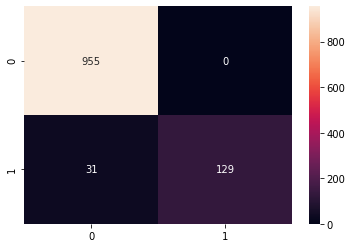

In [11]:
import seaborn as sns
sns.heatmap(CM,annot=True,fmt='d')

In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9721973094170404